In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [3]:
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (sex feature) are represented in this dataset?**

In [9]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [13]:
data['sex'].value_counts(normalize = True)

Male      0.669205
Female    0.330795
Name: sex, dtype: float64

**2. What is the average age (age feature) of women?**

In [15]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (native-country feature)?**

In [24]:
len(data[data['native-country'] == 'Germany'])/len(data) * 100 #0,42%

0.42074874850281013

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?**

In [28]:
data[data['salary'] == '>50K']['age'].mean()

44.24984058155847

In [29]:
data[data['salary'] == '>50K']['age'].std()

10.51902771985177

In [31]:
data[data['salary'] == '<=50K']['age'].mean()

36.78373786407767

In [32]:
data[data['salary'] == '<=50K']['age'].std()

14.020088490824813

**6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)**

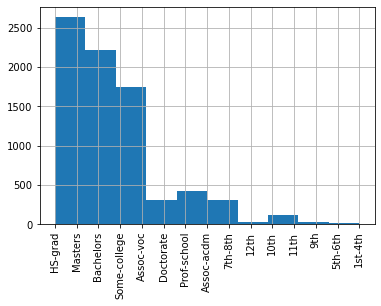

In [37]:
data[data['salary'] == '>50K']['education'].hist()
plt.xticks(rotation=90)
plt.show() #no,there are people who earn more than 50K without high education

**7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.**

In [195]:
display(data[data['sex'] == 'Male'].groupby(['race'])['age'].describe())
display(data[data['sex'] == 'Female'].groupby(['race'])['age'].describe())

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,192.0,37.208333,12.049563,17.0,28.0,35.0,45.0,82.0
Asian-Pac-Islander,693.0,39.073593,12.883944,18.0,29.0,37.0,46.0,90.0
Black,1569.0,37.682600,12.882612,17.0,27.0,36.0,46.0,90.0
Other,162.0,34.654321,11.355531,17.0,26.0,32.0,42.0,77.0
White,19174.0,39.652498,13.436029,17.0,29.0,38.0,49.0,90.0


,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,119.0,37.117647,13.114991,17.0,27.0,36.0,46.00,80.0
Asian-Pac-Islander,346.0,35.089595,12.300845,17.0,25.0,33.0,43.75,75.0
Black,1555.0,37.854019,12.637197,17.0,28.0,37.0,46.00,90.0
Other,109.0,31.678899,11.631599,17.0,23.0,29.0,39.00,74.0
White,8642.0,36.811618,14.329093,17.0,25.0,35.0,46.00,90.0


**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [77]:
data[(data['salary'] == '>50K') & (data['sex'] == 'Male')]['marital-status'].value_counts()

Married-civ-spouse       5938
Never-married             325
Divorced                  284
Separated                  49
Widowed                    39
Married-spouse-absent      23
Married-AF-spouse           4
Name: marital-status, dtype: int64

In [164]:
def idx(marital_status): 
    return 'Married' if marital_status in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'] else 'Single'

In [165]:
data['marital-status-1'] = data['marital-status'].apply(idx)

In [167]:
data[(data['salary'] == '>50K') & (data['sex'] == 'Male')]['marital-status-1'].value_counts(normalize=True) 
#Among those who earn more than 50K, more married males

Married    0.895377
Single     0.104623
Name: marital-status-1, dtype: float64

In [168]:
data[(data['marital-status-1'] == 'Married') & (data['sex'] == 'Male')]['salary'].value_counts(normalize=True)
#Among married males, the proportion earning more than 50K is 11 p.p. less.

<=50K    0.559486
>50K     0.440514
Name: salary, dtype: float64

In [169]:
data[(data['marital-status-1'] == 'Single') & (data['sex'] == 'Male')]['salary'].value_counts(normalize=True)
#Among single males, the proportion earning more than 50K is less than 10% 

<=50K    0.915505
>50K     0.084495
Name: salary, dtype: float64

**9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [174]:
data['hours-per-week'].sort_values(ascending=False) 

8654     99
15460    99
935      99
26250    99
16992    99
         ..
22960     1
9147      1
29752     1
5590      1
32525     1
Name: hours-per-week, Length: 32561, dtype: int64

In [179]:
data[data['hours-per-week'] == 99].shape[0]

85

In [182]:
data[data['hours-per-week'] == 99]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?**


In [190]:
data[data['salary'] == '>50K'].groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False) 
#Japan 47.958333

native-country
Honduras              60.000000
Thailand              58.333333
South                 51.437500
France                50.750000
Greece                50.625000
Columbia              50.000000
Hungary               50.000000
Yugoslavia            49.500000
Ecuador               48.750000
Ireland               48.000000
Japan                 47.958333
Iran                  47.500000
Dominican-Republic    47.000000
Taiwan                46.800000
Scotland              46.666667
Mexico                46.575758
India                 46.475000
Canada                45.641026
?                     45.547945
United-States         45.505369
Italy                 45.400000
Hong                  45.000000
El-Salvador           45.000000
Germany               44.977273
England               44.533333
Philippines           43.032787
Haiti                 42.750000
Cuba                  42.440000
Portugal              41.500000
Jamaica               41.100000
Peru                  40.

In [191]:
data[data['salary'] == '<=50K'].groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False)
#Japan 41.000000

native-country
Thailand                      42.866667
Dominican-Republic            42.338235
Portugal                      41.939394
Outlying-US(Guam-USVI-etc)    41.857143
Greece                        41.809524
Yugoslavia                    41.600000
Iran                          41.440000
Cambodia                      41.416667
France                        41.058824
Japan                         41.000000
Ireland                       40.947368
England                       40.483333
Laos                          40.375000
?                             40.164760
South                         40.156250
Mexico                        40.003279
Holand-Netherlands            40.000000
Italy                         39.625000
Scotland                      39.444444
Guatemala                     39.360656
Hong                          39.142857
Germany                       39.139785
United-States                 38.799127
Columbia                      38.684211
Puerto-Rico              